# Problema 1: Optimización Multiobjetivo en Distribución de Recursos para Misión Humanitaria

Este ejercicio plantea la distribución óptima de recursos esenciales para una misión
humanitaria en Zambia. Se dispone de una flota de aviones para transportar diversos re-
cursos a diferentes zonas afectadas. El problema tiene dos objetivos: maximizar el valor de
impacto social de los recursos transportados y minimizar el costo total de las operaciones
logísticas.

Se cuentan con los siguentes datos para la solución del problema

**Recursos**

| Recurso           | Valor de Impacto (miles USD/TON) | Peso (TON/unidad) | Volumen (m³/unidad) | Disponibilidad (unidades) |
|-------------------|----------------------------------|--------------------|----------------------|----------------------------|
| Alimentos Básicos | 50                               | 5                  | 3                    | 12                         |
| Medicinas         | 100                              | 2                  | 1                    | 15                         |
| Equipos Médicos   | 120                              | 0.3                | 0.5                  | 40                         |
| Agua Potable      | 60                               | 6                  | 4                    | 15                         |
| Mantas            | 40                               | 3                  | 2                    | 20                         |

**Aviones**

| Avión | Capacidad Peso (TON) | Capacidad Volumen (m³) | Costo Fijo (miles USD) | Costo Variable (miles USD/km) |
|-------|-----------------------|-------------------------|-------------------------|-------------------------------|
| 1     | 40                    | 35                      | 15                      | 0.020                         |
| 2     | 50                    | 40                      | 20                      | 0.025                         |
| 3     | 60                    | 45                      | 25                      | 0.030                         |
| 4     | 45                    | 38                      | 18                      | 0.022                         |

**Zonas**

| Zona | Distancia (km) | Población (miles) | Multiplicador de Impacto |
|------|----------------|-------------------|---------------------------|
| A    | 800            | 50                | 1.2                       |
| B    | 1200           | 70                | 1.5                       |
| C    | 1500           | 100               | 1.8                       |
| D    | 900            | 80                | 1.4                       |

**Demanda por Zona**

| Zona | Alimentos (TON) | Agua (TON) | Medicinas (TON) | Equipos (TON) | Mantas (TON) |
|------|------------------|------------|------------------|----------------|---------------|
| A    | 8                | 6          | 2                | 0.6            | 3             |
| B    | 12               | 9          | 3                | 0.9            | 5             |
| C    | 16               | 12         | 4                | 1.2            | 7             |
| D    | 10               | 8          | 2                | 0.6            | 4             |


## 1. Formulación del Modelo Multiobjetivo
---
A continuación se realizará el planteamiento matematico del problema, planteando los conjuntos, parámetros, variables de decisión, funciones objetivo, restricciones y metodo de optimización multi-objetivo.

#### ¿Que Queremos Solucionar?

Se busca **maximizar** el valor del **impacto social** de los recursos transportados y **minimizar** el **costo total** de las operaciónes logisticas que implica el transporte de estos recursos

### Conjuntos
---
$R = R_1, R_2, \dots, R_5$ 

Representando el conjunto de recursos a transportar siguendo la siguente convención:
| Recurso | Identificador |
|---------|---------------|
|Alimentos Basicos | $R_1$|
|Medicinas | $R_2$|
|Equipos Medicos | $R_3$|
|Agua Potable | $R_4$|
|Mantas | $R_5$|

$A = A_1, \dots, A_4$

Representando el conjunto de aviones que pueden transportar los recursos

$Z = Z_1, \dots, Z_4$

Representando el conjunto de zonas siguendo la siguente convención:
| Zona | Identificador |
|------|---------------|
|A | $Z_1$|
|B | $Z_2$|
|C | $Z_3$|
|D | $Z_4$|

### Parámetros
---
**Aviones:**

- $CapPAv_i$ = El valor de la capacidad de peso en **TON** del avion $i, \forall i \in A$
- $CapVAv_i$ = El valor de la capacidad de volumen en $m^3$ del avion $i, \forall i \in A$
- $CostoFijAv_i$ = El valor del costo fijo en **miles USD** del avion $i, \forall i \in A$
- $CostoVarAv_i$ = El valor del costo variable en **miles USD/km** del avion $i, \forall i \in A$

**Recursos:**

- $ValImpRec_j$ = El valor del impacto social en **miles USD/TON** del recurso $j, \forall j \in R$
- $PesoRec_j$ = El peso en **TON/unidad** del recurso $j, \forall j \in R$
- $VolRec_j$ = El volumen en **$m^3$/unidad** del recurso $j, \forall j \in R$
- $DispRec_j$ = La disponibilidad en **unidades** del recurso $j, \forall j \in R$

**Zonas:**

- $Dist_k$ = El valor de la distancia en **km** que se debe recorrer para llegar a la zona $k$, $\forall k \in Z$
- $Pob_k$ = El valor de la poblacion en **miles** que tiene la zona $k$, $\forall k \in Z$
- $MultImp_k$ = El valor del multiplicador de impacto que tiene la zona $k$, $\forall k \in Z$

- $Dem_{j,k}$ = El valor de la demanda del recurso $j$ para la zona $k$, $\forall j,k \in R, Z$

### Variables de Decisión
---
- $
    x_{i,k} =
    \begin{cases}
    1 & \text{si el avión }i\text{ hace un vuelo a la zona }k,\\
    0 & \text{en otro caso.}
    \end{cases}
$

- $
    y_{i,j,k} \in \mathbb{R}^+ \Rightarrow cantidad de unidades del recurso j, que viajan en el avion i a la zona k
    \forall\,i\in A,\;j\in R,\;k\in Z
    $

- $
    v_{i,j,k} =
    \begin{cases}
    1 & \text{si el avión }i\text{ hace un vuelo a la zona }k,\text{con el recurso}j\\
    0 & \text{en otro caso.}
    \end{cases}
$


Indices:

- $i \Rightarrow$ avion
- $j \Rightarrow$ recurso
- $k \Rightarrow$ zona

### Funciones Objetivo
---

**Maximizar el impacto social de recursos transportados**

$$
F_1 = max(\sum_{i \in A} \sum_{j \in R} \sum_{k \in Z} ValImpRec_j * (y_{i,j,k} * PesoRec_j) * MultImp_k)
$$

> Donde:
> 
> $y_{i,j,k}$ es la variable de decisión que representa la cantidad de unidades en el avion $i$, con el recurso $j$, para la zona $k$
>
> $ValImpRec_j$ es el valor del impacto que tiene el recurso $j$
>
> $MultImp_k$ es el multiplicador de impacto de la zona $k$
>
> $PesoRec_j$ es el peso en TON que tiene el recurso $j$ por cada unidad

**Minimizar los costos logisticos de transporte**

$$
F_2 = min(\sum_{i \in A} \sum_{k \in Z} x_{i,k} * (CostFijAv_i + Dist_k * CostVarAv_i))
$$

>  Donde:
>
> $x_{i,k}$ es la variable de decisión binaria que determina si se realiza o no el viaje en el avion $i$, para la zona $k$
>
> $CostFijAv_i$ es el costo fijo de utilizar el avion $i$
>
> $CostVarAv_i$ es el costo variable (depende de la cantidad de km) de utilizar el avion $i$
>
> $Dist_k$ es la distancia en km que se debe recorrer para llegar a la zona $k$

### Relaciones
---
- Condicionar el valor de $y_{i,j,k}$ a la variable binaria $x_{i,k}$
$$
y_{i,j,k} \le M*x_{i,k}, \forall i,j,k \in A,R,Z
$$

- Condicionar el valor de $y_{i,j,k}$ a la variable binaria $v_{i,j,k}$
$$
y_{i,j,k} \le M*v_{i,j,k}, \forall i,j,k \in A,R,Z
$$

- Limitar los recursos de un avion para que no superen la capacidad maxima de peso
$$
\sum_{j ∈ R} y_{i,j,k} * PesoRec_j ≤ CapPAv_i, ∀i,k ∈ A,Z
$$

- Limitar los recursos de un avion para que no superen la capacidad maxima de volumen
$$
\sum_{j ∈ R} y_{i,j,k} * VolRec_j ≤ CapVAv_i, ∀i,k ∈ A,Z
$$

- Limita la distribución de recursos para que no superen el limite de disponibilidad de unidades
$$
\sum_{i \in A}\sum_{k \in Z} y_{i,j,k} \leq  DispRec_j, \forall j \in R
$$

- Se deben satisfacer por completo las necesidades minimas de cada zona para cada recurso
$$
\sum_{i \in A} y_{i,j,k} * PesoRec_j \geq Dem_{j,k}, \forall j, k \in R, Z
$$

### Restricciones
---
- Cada avión puede realizar hasta 2 viajes a diferentes zonas, no puede viajar 2 veces a la misma zona:

$$
\sum_{k \in Z} x_{i,k} \leq 2, \forall i \in A
$$

- Las medicinas ($R_2$) no podrán transportarse en el Avión 1 debido a la falta de sistemas de refrigeración adecuado

$$
v_{A_1, R_2, k} = 0, \forall k \in Z
$$

- Los equipos médicos ($R_3$) y el agua potable ($R_4$) no pueden viajar en el mismo avión durante el mismo viaje

$$
v_{i, R_3, k} + v_{i, R_4, k} \leq 1, \forall i,k \in A,Z
$$

- Todos los recursos pueden dividirse y transportarse en fracciones, excepto los equipos médicos que son dispositivos indivisibles de 300 kg cada uno

$$
y_{i, R_3, k}(PesoRec_{R_3} * 1000) mod_{300} = 0, \forall i,k \in A,Z
$$

### Método Multiobjetivo

Se decide utilizar el metodo de $\epsilon$-constraint, al solo tener 2 funciones objetivo se encuentra más sencillo utilizar este metodo para la solución del problema. Se va a priorizar la función de impacto social, y la función de costos pasará a ser una restricción.

Funciones iniciales:

$$
Z = max(\sum_{i \in A} \sum_{j \in R} \sum_{k \in Z} ValImpRec_j * (y_{i,j,k} * PesoRec_j) * MultImp_k)
$$
$$
\sum_{i \in A} \sum_{k \in Z} x_{i,k} * (CostFijAv_i + Dist_k * CostVarAv_i) \leq \epsilon_{costo}
$$



# 2. Implementación del Metodo $\epsilon$ - constraint

### Carga de Datos
---

In [1]:
import csv

def load_csv_to_dicts(filepath, id_field):
    data = {}
    with open(filepath, newline='', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        fieldnames = reader.fieldnames
        value_fields = [field for field in fieldnames if field != id_field]
        
        for row in reader:
            key = int(row[id_field])  # Convert key to integer
            # Create tuple of values in the order they appear in the CSV
            values = tuple(float(row[field]) if row[field].replace('.', '', 1).isdigit() 
                          else row[field] for field in value_fields)
            data[key] = values
            
    return data

# Cargar recursos
recursos = load_csv_to_dicts('datos_recursos_punto1.csv', 'recurso')

# Cargar aviones
aviones = load_csv_to_dicts('datos_aviones_punto1.csv', 'avion')

# Cargar zonas
zonas = load_csv_to_dicts('datos_zonas_punto1.csv', 'zona')

# Cargar necesidades
necesidades = load_csv_to_dicts('datos_necesidades_punto1.csv', 'zona')

equivalencias = {
    1:'alimentos',
    2:'medicinas',
    3:'equipos',
    4:'agua',
    5:'mantas'
}

# Mostrar resultados cargados
print("Recursos (recurso: (valor_impacto, peso, volumen, disponibilidad)):\n", recursos)
print("\nAviones (avion: (capacidad_peso, capacidad_volumen, costo_fijo, costo_variable)):\n", aviones)
print("\nZonas (zona: (distancia, poblacion, multiplicador_impacto)):\n", zonas)
print("\nNecesidades (zona: (alimentos, medicinas, equipos, agua, mantas)):\n", necesidades)


Recursos (recurso: (valor_impacto, peso, volumen, disponibilidad)):
 {1: (50.0, 5.0, 3.0, 12.0), 2: (100.0, 2.0, 1.0, 15.0), 3: (120.0, 0.3, 0.5, 40.0), 4: (60.0, 6.0, 4.0, 15.0), 5: (40.0, 3.0, 2.0, 20.0)}

Aviones (avion: (capacidad_peso, capacidad_volumen, costo_fijo, costo_variable)):
 {1: (40.0, 35.0, 15.0, 0.02), 2: (50.0, 40.0, 20.0, 0.025), 3: (60.0, 45.0, 25.0, 0.03), 4: (45.0, 38.0, 18.0, 0.022)}

Zonas (zona: (distancia, poblacion, multiplicador_impacto)):
 {1: (800.0, 50.0, 1.2), 2: (1200.0, 70.0, 1.5), 3: (1500.0, 100.0, 1.8), 4: (900.0, 80.0, 1.4)}

Necesidades (zona: (alimentos, medicinas, equipos, agua, mantas)):
 {1: (8.0, 2.0, 0.6, 6.0, 3.0), 2: (12.0, 3.0, 0.9, 9.0, 5.0), 3: (16.0, 4.0, 1.2, 12.0, 7.0), 4: (10.0, 2.0, 0.6, 8.0, 4.0)}


### Planteamiento del Modelo en Pyomo
---

Primero deberémos encontrar los rangos en que costo podrá variar

In [2]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

def optimizacion_recursos(objetivo):
    model = ConcreteModel()

    # ——————————————————————————
    # 1. Datos
    # recursos[j]   = (impacto, peso, volumen, disponibilidad)
    # aviones[i]    = (cap_peso, cap_volumen, costo_fijo, costo_var/km)
    # zonas[k]      = (distancia, poblacion, mult_impacto)
    # necesidades[k]= (dem_R1, dem_R2, ..., dem_R5)
    # ——————————————————————————

    # 2. Conjuntos
    model.A = RangeSet(1,4)   # 4 aviones
    model.R = RangeSet(1,5)   # 5 recursos
    model.Z = RangeSet(1,4)   # 4 zonas

    # 3. Parámetros auxiliares
    M_val = 100000000
    model.M = Param(initialize=M_val, mutable=False)

    # 4. Variables
    model.x = Var(model.A, model.Z, domain=Binary)           # vuelo i→k
    model.v = Var(model.A, model.R, model.Z, domain=Binary)  # “lleva recurso j”
    model.y = Var(model.A, model.R, model.Z, domain=NonNegativeReals)

    # 5. Objetivo: minimizar costo total
    def cost_rule(m):
        return sum(
            m.x[i,k] 
            * (aviones[i][2] + zonas[k][0] * aviones[i][3])
            for i in m.A for k in m.Z
        )
    model.Costo = Objective(rule=cost_rule, sense=objetivo)

    # 6. Restricciones

    # 6.1 Vincular y ≤ M·v, v ≤ x
    def y_v_link(m, i, j, k):
        return m.y[i,j,k] <= m.M * m.v[i,j,k]
    model.Link_y_v = Constraint(model.A, model.R, model.Z, rule=y_v_link)

    def v_x_link(m, i, j, k):
        return m.v[i,j,k] <= m.x[i,k]
    model.Link_v_x = Constraint(model.A, model.R, model.Z, rule=v_x_link)

    # 6.2 Capacidad de peso y volumen por vuelo (i,k)
    def peso_cap(m, i, k):
        return sum(m.y[i,j,k] * recursos[j][1] for j in m.R) <= aviones[i][0]
    model.PesoCap = Constraint(model.A, model.Z, rule=peso_cap)

    def volumen_cap(m, i, k):
        return sum(m.y[i,j,k] * recursos[j][2] for j in m.R) <= aviones[i][1]
    model.VolCap = Constraint(model.A, model.Z, rule=volumen_cap)

    # 6.3 Disponibilidad global de recursos
    def disponibilidad(m, j):
        return sum(m.y[i,j,k] for i in m.A for k in m.Z) <= recursos[j][3]
    model.Disponibilidad = Constraint(model.R, rule=disponibilidad)

    # 6.4 Satisfacer demanda por recurso y zona
    def demanda(m, j, k):
        # Nota: Demanda está en unidades
        return sum(m.y[i,j,k] * recursos[j][1] for i in m.A) >= necesidades[k][j-1]
    model.Demanda = Constraint(model.R, model.Z, rule=demanda)

    # 6.5 Cada avión puede volar como máximo 2 veces
    def max_vuelos(m, i):
        return sum(m.x[i,k] for k in m.Z) <= 2
    model.MaxVuelos = Constraint(model.A, rule=max_vuelos)

    # 6.7 Sin medicinas en avión 1 (recurso j=2)
    def no_medicinas_en1(m, k):
        return m.v[1,2,k] == 0
    model.NoMedic1 = Constraint(model.Z, rule=no_medicinas_en1)

    # 6.8 Equipos (j=3) y agua (j=4) no en el mismo vuelo
    def sin_equip_agua(m, i, k):
        return m.v[i,3,k] + m.v[i,4,k] <= 1
    model.SinEquipAgua = Constraint(model.A, model.Z, rule=sin_equip_agua)

    # 6.9 Equipos médicos indivisibles (peso=0.3 TON c/u):
    #      en lugar de módulo, introducimos u[i,k] entero:
    model.u = Var(model.A, model.Z, domain=NonNegativeIntegers)
    def indivisibilidad(m, i, k):
        # y[i,3,k] toneladas = 0.3 * u dispositivos
        return m.y[i,3,k] == 0.3 * m.u[i,k]
    model.Indiv = Constraint(model.A, model.Z, rule=indivisibilidad)

    # 7. Resolver
    solver = SolverFactory('glpk')
    solver.solve(model)
    
    
    return model

m_max = optimizacion_recursos(maximize)
m_min = optimizacion_recursos(minimize)

print("Costo Maximo:", value(m_max.Costo))
print("Costo Minimo:", value(m_min.Costo()))


Costo Maximo: 375.9
Costo Minimo: 362.9


Con esto podemos ver que nuestro $\epsilon$ va a variar entre 362.9 y 375.9

$$
362.9 \leq \epsilon \leq 375.9
$$

Con esto, ya podemos implementar la restriccion de costo y nuestra funcion objetivo de impacto social

In [3]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
from amplpy import modules
import numpy as np

def optimizacion_recursos(epsilon):
    model = ConcreteModel()

    # ——————————————————————————
    # 1. Datos
    # recursos[j]   = (impacto, peso, volumen, disponibilidad)
    # aviones[i]    = (cap_peso, cap_volumen, costo_fijo, costo_var/km)
    # zonas[k]      = (distancia, poblacion, mult_impacto)
    # necesidades[k]= (dem_R1, dem_R2, ..., dem_R5)
    # ——————————————————————————

    # 2. Conjuntos
    model.A = RangeSet(1,4)   # 4 aviones
    model.R = RangeSet(1,5)   # 5 recursos
    model.Z = RangeSet(1,4)   # 4 zonas

    # 3. Parámetros auxiliares
    M_val = 100000000
    model.M = Param(initialize=M_val, mutable=False)

    # 4. Variables
    model.x = Var(model.A, model.Z, domain=Binary)           # vuelo i→k
    model.v = Var(model.A, model.R, model.Z, domain=Binary)  # “lleva recurso j”
    model.y = Var(model.A, model.R, model.Z, domain=NonNegativeReals)

    # 5. Objetivo: maximizar  el impacto total
    def impacto_social_objective(m):
        return sum(
            recursos[j][0] * (model.y[i,j,k] * recursos[j][1]) * zonas[k][2]
            for i in model.A
            for j in model.R
            for k in model.Z
        )
    model.impacto = Objective(rule=impacto_social_objective, sense=maximize)
    
    
    def cost_rule(m):
        return sum(
            m.x[i,k] 
            * (aviones[i][2] + zonas[k][0] * aviones[i][3])
            for i in m.A for k in m.Z
            ) <= epsilon
    model.costo = Constraint(rule=cost_rule)

    # 6. Restricciones

    # 6.1 Vincular y ≤ M·v, v ≤ x
    def y_v_link(m, i, j, k):
        return m.y[i,j,k] <= m.M * m.v[i,j,k]
    model.Link_y_v = Constraint(model.A, model.R, model.Z, rule=y_v_link)

    def v_x_link(m, i, j, k):
        return m.v[i,j,k] <= m.x[i,k]
    model.Link_v_x = Constraint(model.A, model.R, model.Z, rule=v_x_link)

    # 6.2 Capacidad de peso y volumen por vuelo (i,k)
    def peso_cap(m, i, k):
        return sum(m.y[i,j,k] * recursos[j][1] for j in m.R) <= aviones[i][0]
    model.PesoCap = Constraint(model.A, model.Z, rule=peso_cap)

    def volumen_cap(m, i, k):
        return sum(m.y[i,j,k] * recursos[j][2] for j in m.R) <= aviones[i][1]
    model.VolCap = Constraint(model.A, model.Z, rule=volumen_cap)

    # 6.3 Disponibilidad global de recursos
    def disponibilidad(m, j):
        return sum(m.y[i,j,k] for i in m.A for k in m.Z) <= recursos[j][3]
    model.Disponibilidad = Constraint(model.R, rule=disponibilidad)

    # 6.4 Satisfacer demanda por recurso y zona
    def demanda(m, j, k):
        # Nota: Demanda está en unidades
        return sum(m.y[i,j,k] * recursos[j][1] for i in m.A) >= necesidades[k][j-1]
    model.Demanda = Constraint(model.R, model.Z, rule=demanda)

    # 6.5 Cada avión puede volar como máximo 2 veces
    def max_vuelos(m, i):
        return sum(m.x[i,k] for k in m.Z) <= 2
    model.MaxVuelos = Constraint(model.A, rule=max_vuelos)

    # 6.7 Sin medicinas en avión 1 (recurso j=2)
    def no_medicinas_en1(m, k):
        return m.v[1,2,k] == 0
    model.NoMedic1 = Constraint(model.Z, rule=no_medicinas_en1)

    # 6.8 Equipos (j=3) y agua (j=4) no en el mismo vuelo
    def sin_equip_agua(m, i, k):
        return m.v[i,3,k] + m.v[i,4,k] <= 1
    model.SinEquipAgua = Constraint(model.A, model.Z, rule=sin_equip_agua)

    # 6.9 Equipos médicos indivisibles (peso=0.3 TON c/u):
    #      en lugar de módulo, introducimos u[i,k] entero:
    model.u = Var(model.A, model.Z, domain=NonNegativeIntegers)
    def indivisibilidad(m, i, k):
        # y[i,3,k] toneladas = 0.3 * u dispositivos
        return m.y[i,3,k] == 0.3 * m.u[i,k]
    model.Indiv = Constraint(model.A, model.Z, rule=indivisibilidad)

    # 7. Resolver
    solver_name = 'highs'
    solver = SolverFactory(solver_name+"nl", executable=modules.find(solver_name), solve_io="nl")
    solver.solve(model, tee=True)
    
    
    return model

resultados = []

epsilon_list = np.arange(362.9, 375.9, 1.85)

for epsilon in epsilon_list:
    m = optimizacion_recursos(epsilon)
    resultados.append(m)


HiGHS 1.10.0HiGHS 1.10.0HiGHS 1.10.0HiGHS 1.10.0HiGHS 1.10.0HiGHS 1.10.0HiGHS 1.10.0HiGHS 1.10.0

Ahora vamos a proceder con la visualizacion de resultados y el analisis del frente de pareto

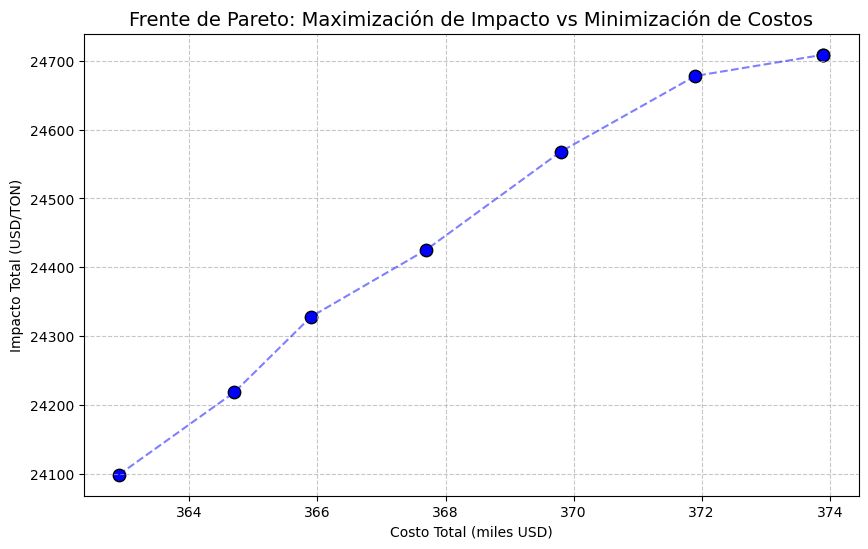

In [20]:
import matplotlib.pyplot as plt

x_costo = []
y_impacto = []

for model in resultados:
    x_costo.append(value(model.costo))
    y_impacto.append(value(model.impacto))
    
    
plt.figure(figsize=(10, 6))
plt.scatter(x_costo, y_impacto, s=80, color='blue', edgecolor='black')
plt.plot(x_costo, y_impacto, 'b--', alpha=0.5)
plt.xlabel('Costo Total (miles USD)')
plt.ylabel('Impacto Total (USD/TON)')
plt.title('Frente de Pareto: Maximización de Impacto vs Minimización de Costos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()